# (Gaussian) Naive Bayes Classifier

Naive Bayes classifier are Bayes classifiers with naively assuming independence of observed features.
The Naive Bayes classifier is a maximum a-posteriori classifier, assigning a new sample to the class with highest a-posteriori probability. If an uniformed prior like the uniform distribution is used, then the maximum aposteriori probability (MAP) estimate is equal to the maximum likelihood estimate.

Using that the joint probability for observing a class $C_k$ and the observations $x_1, \dots x_n$ can be rewritten (using the definition of conditional probabilities): 

$\begin{align}
p(C_k, x_1, \ldots, x_n) & = p(x_1, \ldots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2, \ldots, x_n, C_k) \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2 \mid x_3, \ldots, x_n, C_k) \ p(x_3, \ldots, x_n, C_k) \\
                        & = \cdots \\
                        & = p(x_1 \mid x_2, \ldots, x_n, C_k) \ p(x_2 \mid x_3, \ldots, x_n, C_k) \cdots   p(x_{n-1} \mid x_n, C_k) \ p(x_n \mid C_k) \ p(C_k) \\
\end{align}$

we obtain the conditional probability of a class given the observations (assuming mutual independence of observations: $p(x_i \mid x_{i+1}, \ldots ,x_{n}, C_k ) = p(x_i \mid C_k)$):

$
\begin{align}
p(C_k \mid x_1, \ldots, x_n)& = \frac{p(C_k, x_1, \ldots, x_n)}{p(x_1, \ldots, x_n)} \\
                            & \varpropto p(C_k, x_1, \ldots, x_n) \\
                            & \varpropto p(C_k) \ p(x_1 \mid C_k) \ p(x_2\mid C_k) \ p(x_3\mid C_k) \ \cdots \\
                            & \varpropto p(C_k) \prod_{i=1}^n p(x_i \mid C_k)\,,
\end{align}
$

(compare https://en.wikipedia.org/wiki/Naive_Bayes_classifier )

Which is the Naive Bayes classificator.
Given a sets of observations which are associated with each class we can compute the naive Bayes classificator via:

* coming up with a prior $p(C_k)$ for each class k
* computing the conditional probabilities $p(x_i|C_k)$
* computing the a-posterior probability $p(C_k \mid x_1, \ldots, x_n)$
* computing $\tilde k = \arg \max_k p(C_k \mid x_1, \ldots x_n)$ which leaves C_{\tilde k} as MAP estimator of the maximum a-posterior estimator

We get the Gaussian Naive Bayes classifier by assuming that $p(x_i|C_k) \sim \mathcal{N}$ (i.e. are Gaussian).
Let us assume there are classes A and B, as well as features U and W. Then the following constructs the naive Bayes classifier.

In [1]:
from statistics import NormalDist
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict

In [10]:
# generating sample data
samples_A = {}
mid_u_A = -3
mid_w_A = -1
num_A = 1000
samples_A["U"] = np.random.normal(loc=mid_u_A, size=num_A)
samples_A["W"] = np.random.normal(loc=mid_w_A, size=num_A)

samples_B = {}
mid_u_B = -3
mid_w_B = 3
num_B = num_A
samples_B["U"] = np.random.normal(loc=mid_u_B, size=num_B)
samples_B["W"] = np.random.normal(loc=mid_w_B, size=num_B)

In [11]:
# compute the conditional distributions of u and v depending on the class
# internally computes sample mean and sample standard deviation
estimated_distribution_U_given_A = NormalDist.from_samples(samples_A["U"])
estimated_distribution_W_given_A = NormalDist.from_samples(samples_A["W"])

estimated_distribution_U_given_B = NormalDist.from_samples(samples_B["U"])
estimated_distribution_W_given_B = NormalDist.from_samples(samples_B["W"])

prior_A = num_A / (num_A + num_B)
prior_B = num_B / (num_A + num_B)


def determine_class(new_sample: Dict[float, float]) -> int:
    # returns 0 if the sample is classified to belong to A, or 1 if the sample is classified to belong to B
    aposteriori_new_sample_A = (
        prior_A
        * estimated_distribution_U_given_A.pdf(new_sample["U"])
        * estimated_distribution_W_given_A.pdf(new_sample["W"])
    )
    aposteriori_new_sample_B = (
        prior_B
        * estimated_distribution_U_given_B.pdf(new_sample["U"])
        * estimated_distribution_W_given_B.pdf(new_sample["W"])
    )
    k_tilde = np.argmax([aposteriori_new_sample_A, aposteriori_new_sample_B])
    return k_tilde


# new_sample = {"U": -0.5, "W": -3.5}  # U,W tuple

Next we plot the decision boundary.

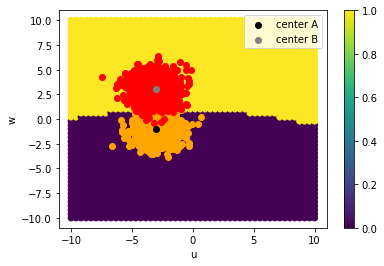

In [16]:
us = []
ws = []
results = []
for u in np.linspace(-10, 10):
    for w in np.linspace(-10, 10):
        us.append(u)
        ws.append(w)
        results.append(determine_class({"U": u, "W": w}))

plt.scatter(us, ws, c=results)
plt.colorbar()
plt.xlabel("u")
plt.ylabel("w")
plt.scatter(samples_A["U"], samples_A["W"], c="orange")
plt.scatter(samples_B["U"], samples_B["W"], c="red")
plt.scatter([mid_u_A], [mid_w_A], label="center A", c="black")
plt.scatter([mid_u_B], [mid_w_B], label="center B", c="gray")

plt.legend();